<a href="https://colab.research.google.com/github/POORNI-AIDA/cd/blob/main/Ensemble_Learning_Bagging_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ensemble Learning


#Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Importing the dataset

In [ ]:
data=pd.read_csv("diabetes.csv")

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Describing the dataset

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Checking the null values

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Remove unnecessary column from the Dataset-> In this dataset, there is no need to remove the unnecsessary columns anmd rows. So, no removal of columns are done here.

In [11]:
df = data.drop(columns=['SkinThickness'])

In [12]:
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [13]:
X1=df.drop(['Outcome'],axis=1)
y1 = df['Outcome']

In [14]:
print(X1)

     Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0              6      148             72        0  33.6   
1              1       85             66        0  26.6   
2              8      183             64        0  23.3   
3              1       89             66       94  28.1   
4              0      137             40      168  43.1   
..           ...      ...            ...      ...   ...   
763           10      101             76      180  32.9   
764            2      122             70        0  36.8   
765            5      121             72      112  26.2   
766            1      126             60        0  30.1   
767            1       93             70        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   

In [15]:
print(y1)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#Visualization of the Missing values

Text(0, 0.5, 'Count')

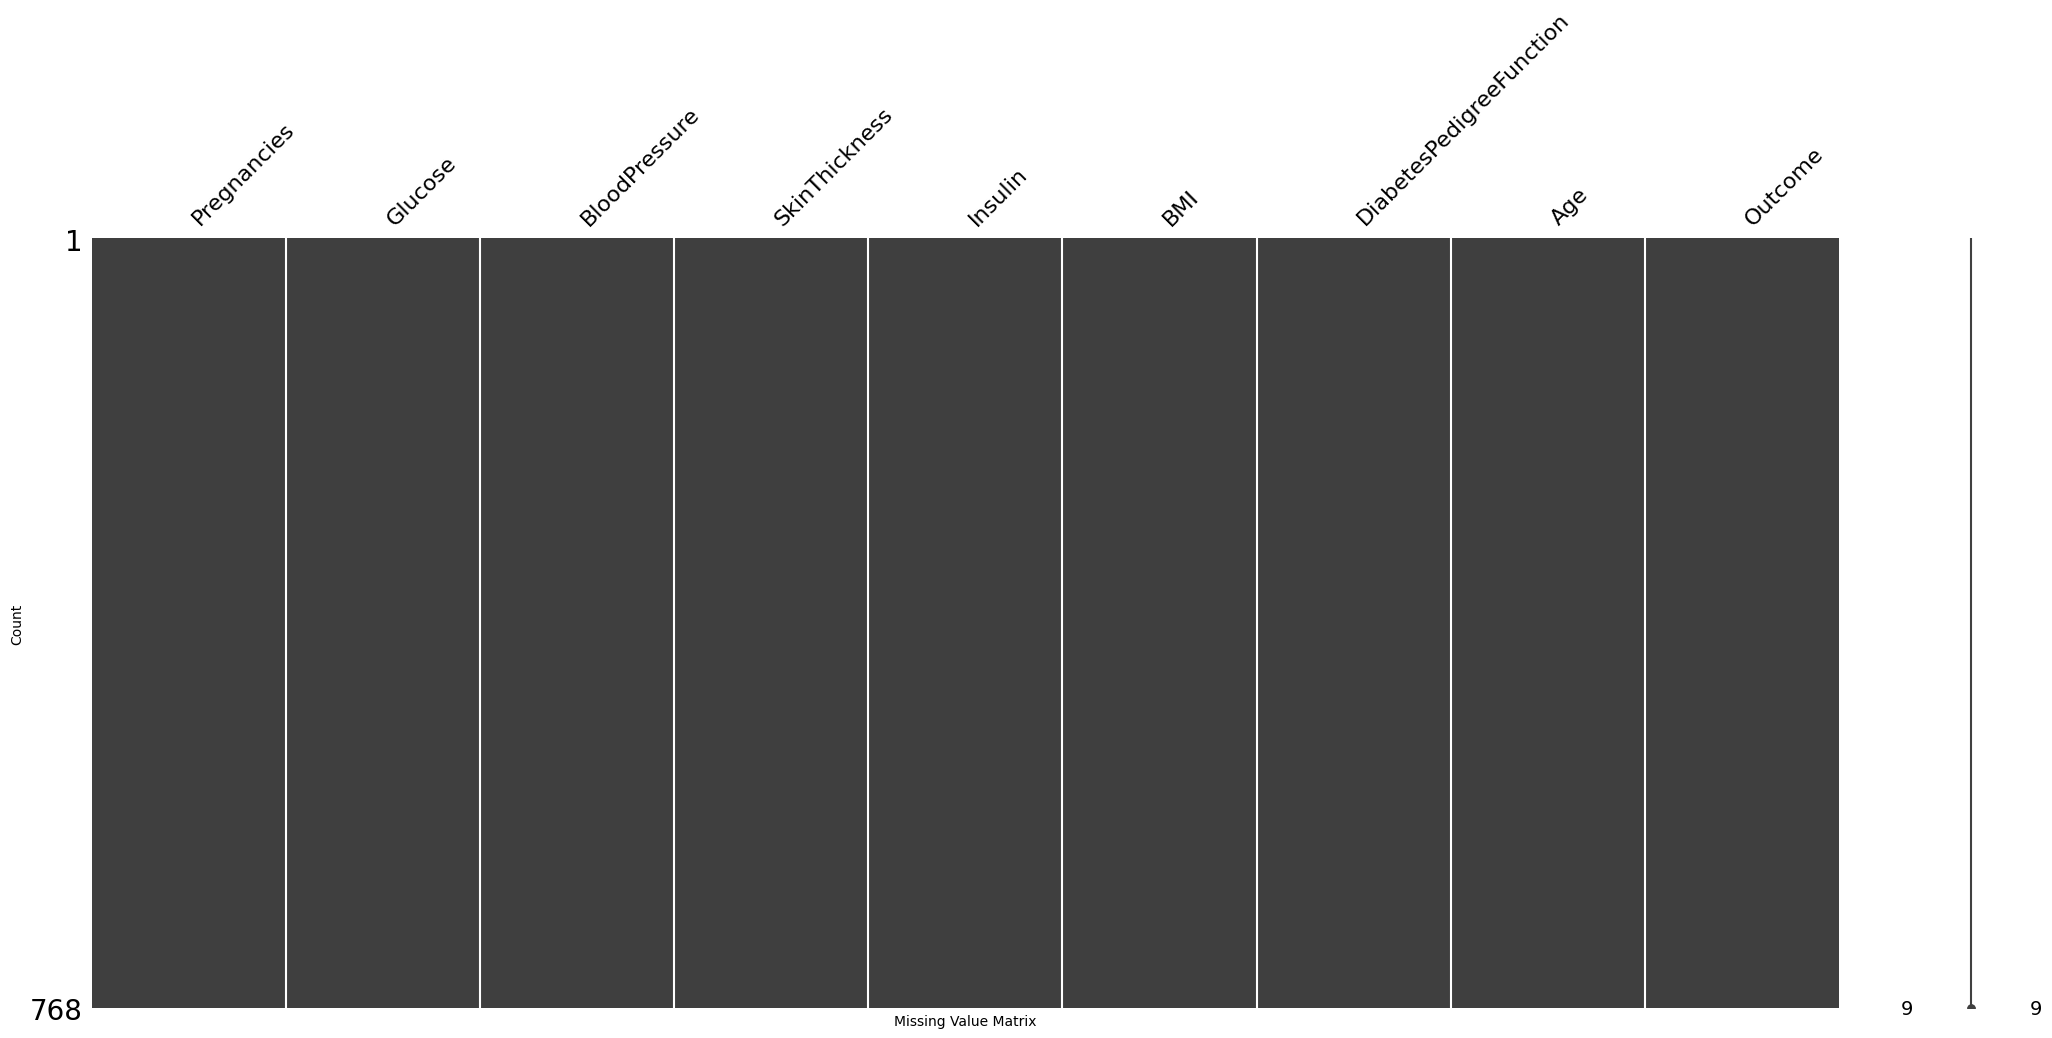

In [16]:
# Visualising Missing data
import missingno as msno
msno.matrix(data)
plt.xlabel("Missing Value Matrix")
plt.ylabel("Count")

#Exploratory Data Anaysis(EDA)

Text(0.5, 1.0, 'Pregnancies')

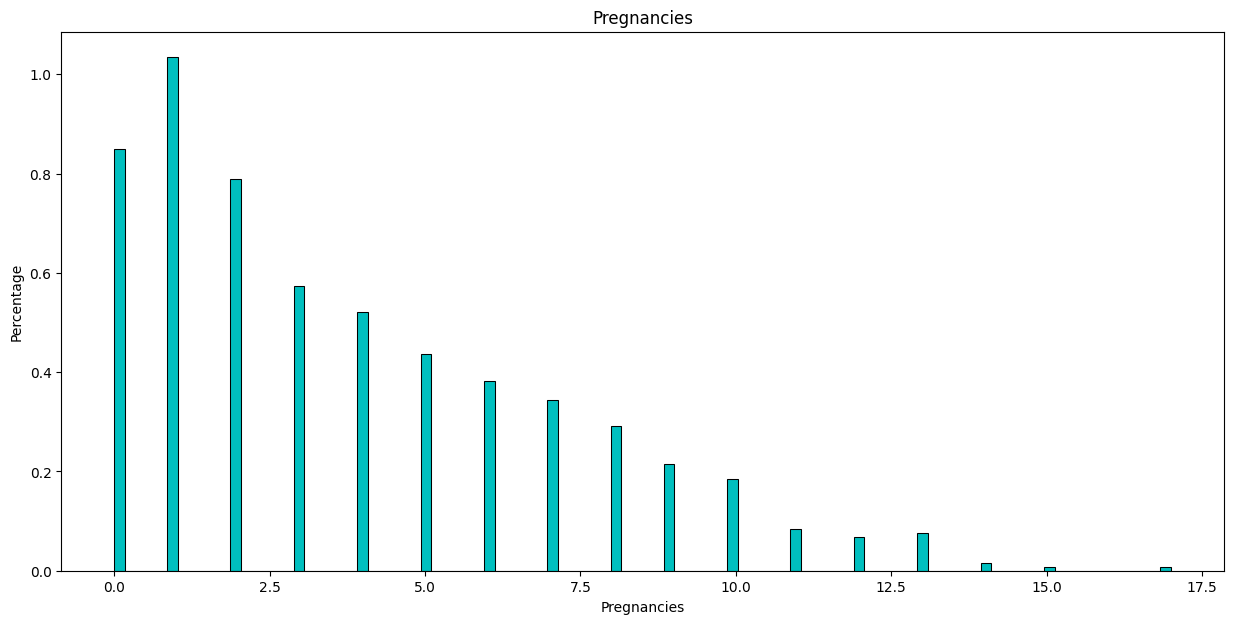

In [17]:
# Pregnancies
plt.figure(figsize=(15,7))
sns.histplot(data["Pregnancies"], facecolor='c', bins=100, stat="density");
plt.ylabel("Percentage")
plt.title("Pregnancies")

Text(0.5, 1.0, 'Glucose')

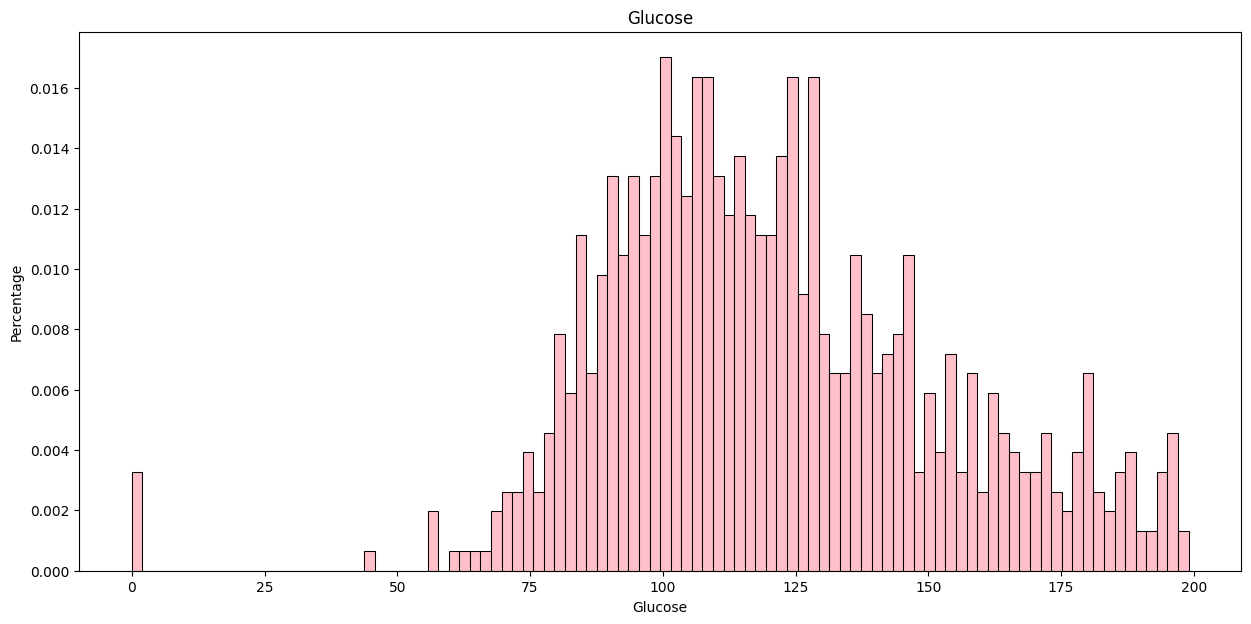

In [18]:
# Glucose
plt.figure(figsize=(15,7))
sns.histplot(data["Glucose"], facecolor='pink', bins=100, stat="density");
plt.ylabel("Percentage")
plt.title("Glucose")

Text(0.5, 1.0, 'BloodPressure')

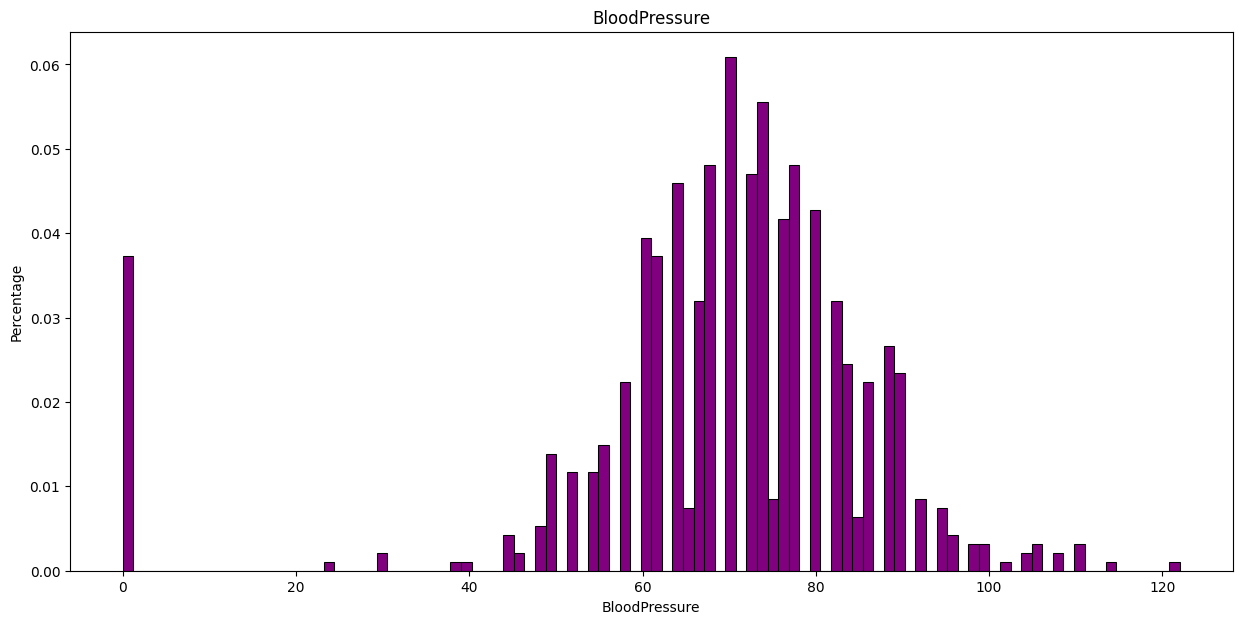

In [19]:
# BloodPressure
plt.figure(figsize=(15,7))
sns.histplot(data["BloodPressure"], facecolor='purple', bins=100, stat="density");
plt.ylabel("Percentage")
plt.title("BloodPressure")

Text(0.5, 1.0, 'SkinThickness')

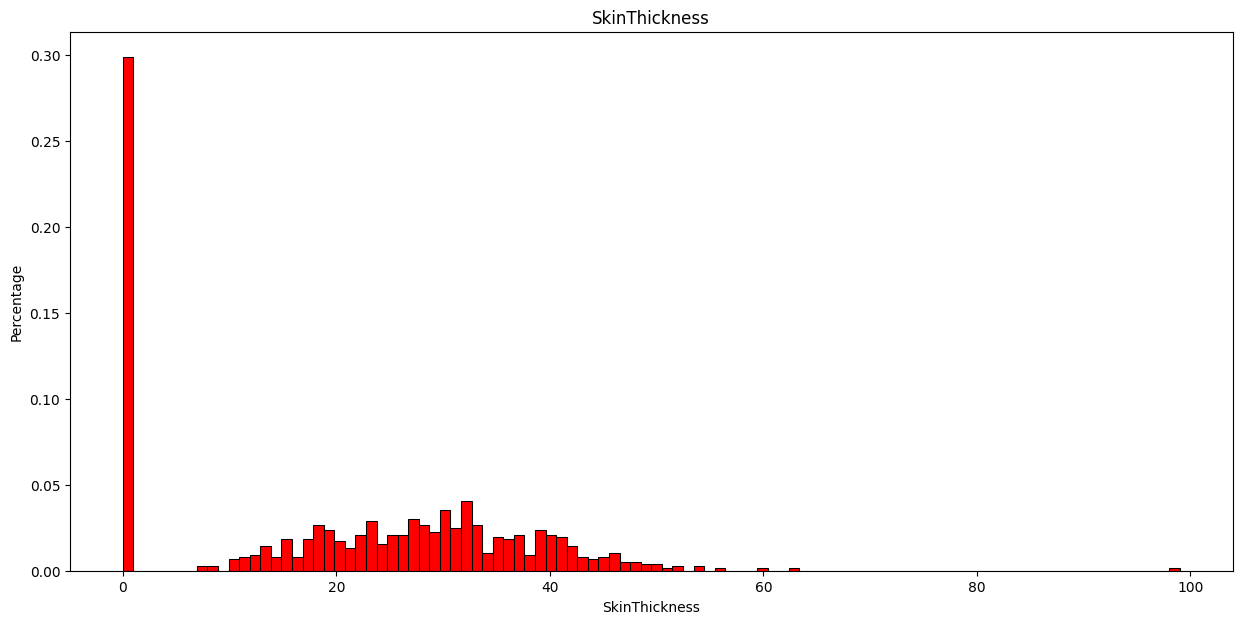

In [20]:
# SkinThickness
plt.figure(figsize=(15,7))
sns.histplot(data["SkinThickness"], facecolor='red', bins=100, stat="density");
plt.ylabel("Percentage")
plt.title("SkinThickness")

#Visualisation of Target Variable

<ipython-input-21-7a1a717b0fd6>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-pastel')


array([<Axes: ylabel='Outcome'>], dtype=object)

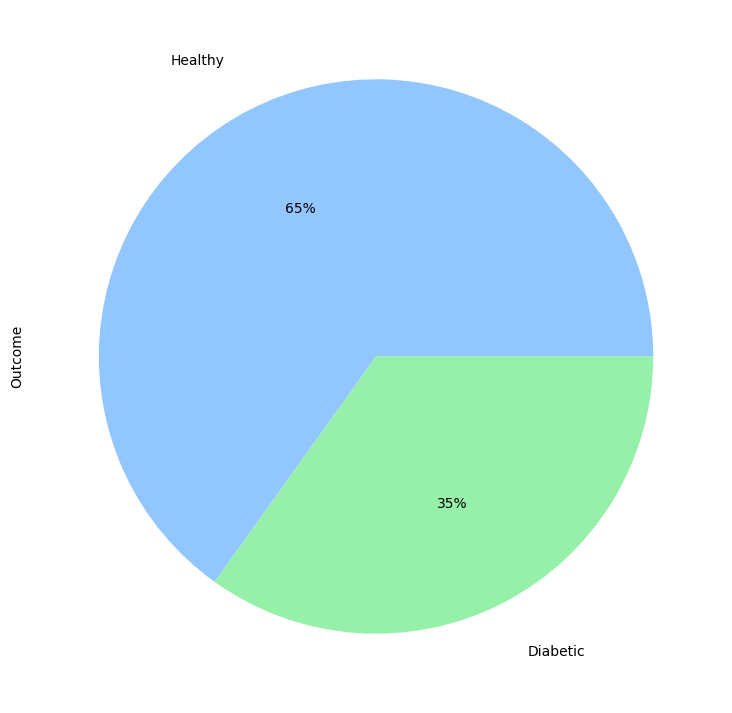

In [21]:
import matplotlib.style as style
style.available

style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
data['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2,figsize=(9,9))

Sample of diabetic people:  268
Sample of healthy people:  500


<ipython-input-22-9fd57a278420>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Outcome'], data=data, palette="husl")


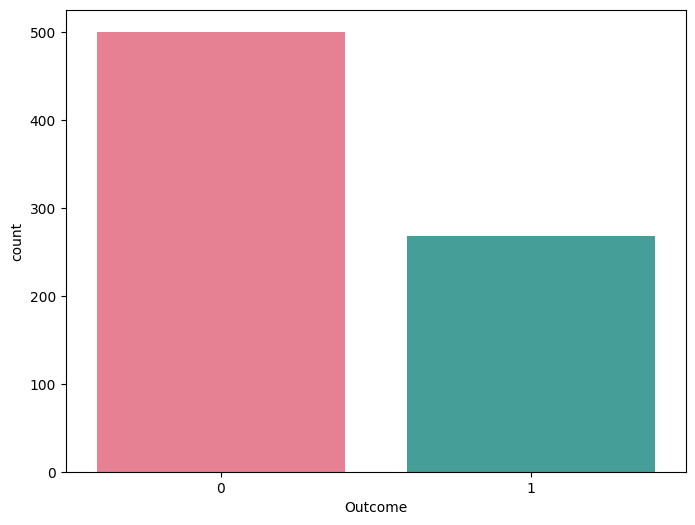

In [22]:
from matplotlib.pyplot import figure, show

figure(figsize=(8,6))
ax = sns.countplot(x=data['Outcome'], data=data, palette="husl")
healthy, diabetics = data['Outcome'].value_counts().values
print("Sample of diabetic people: ",diabetics)
print("Sample of healthy people: ",healthy)

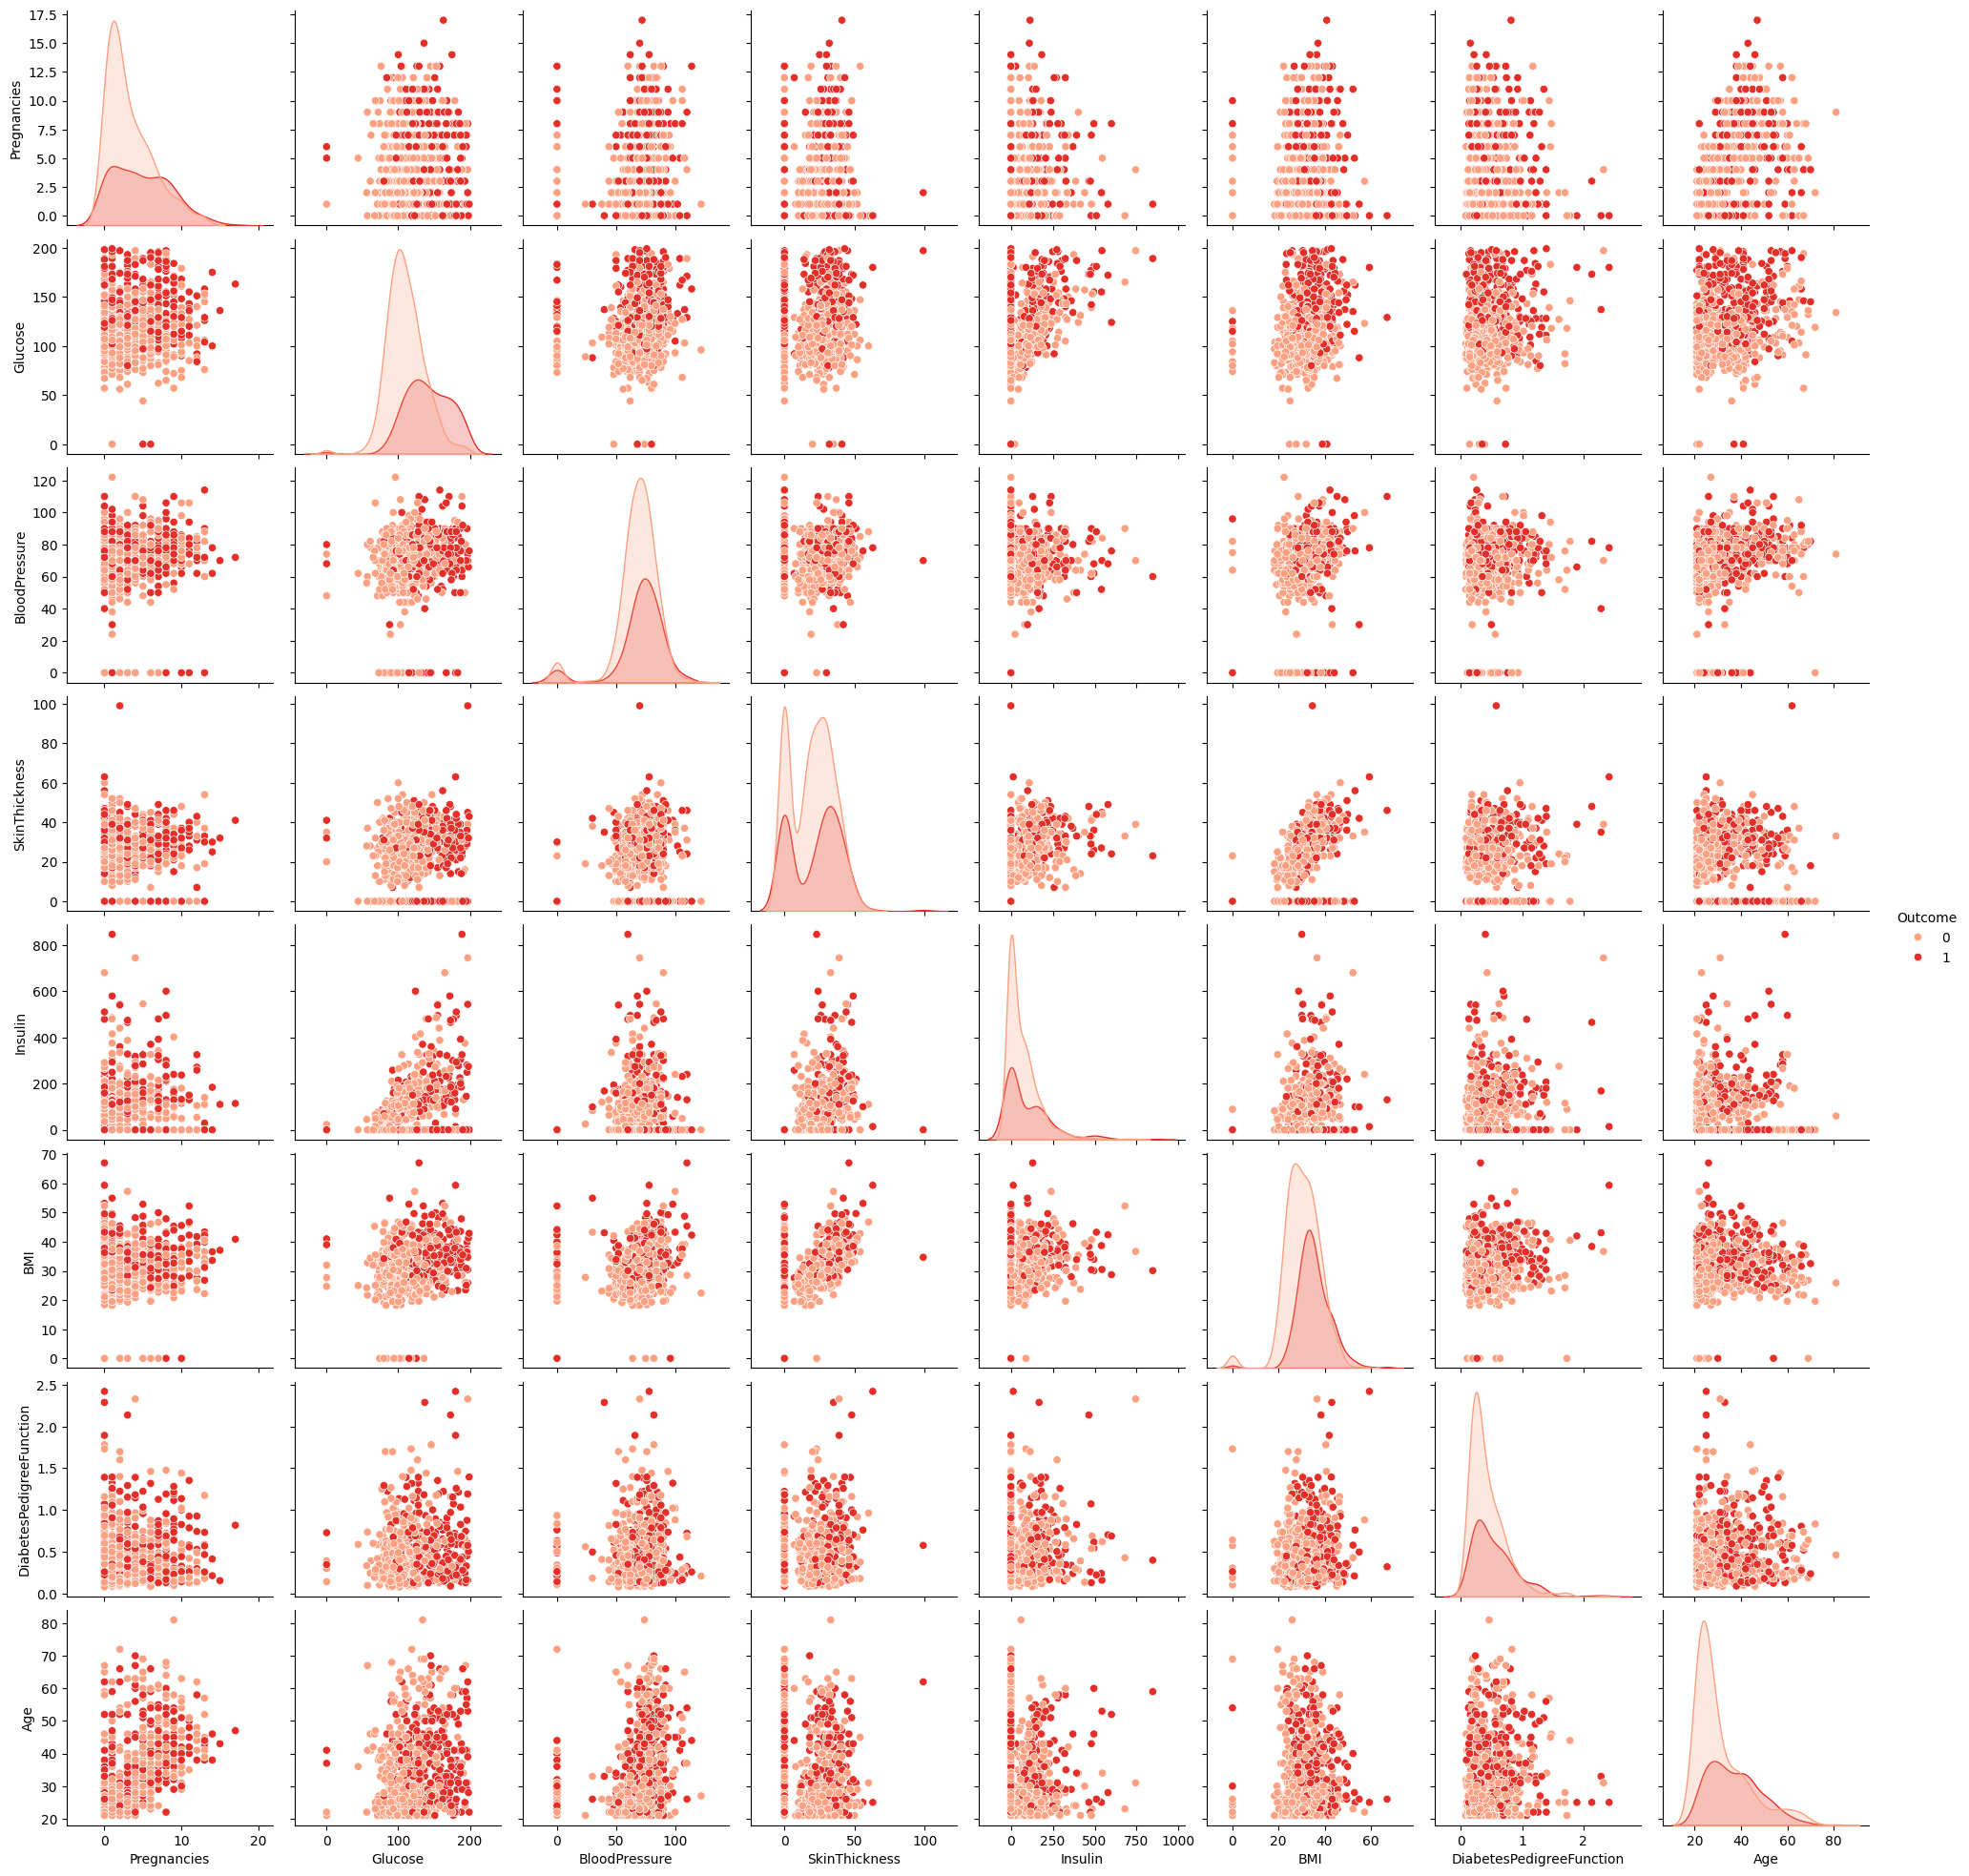

In [23]:
sns.pairplot(data, hue="Outcome", palette="Reds")

In [24]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#Feature Scaling using StandardScaler to scale the features before applying

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
print(X_train)

[[ 0.06459212 -0.77092144 -0.43922309 ... -0.47467996 -0.07502996
  -0.94438203]
 [ 0.36223259 -0.32186694  0.15969386 ... -1.04451678 -0.18379061
  -0.5204699 ]
 [-1.12596979  1.89133023  1.05806928 ...  0.62523762 -0.46475564
   0.15778952]
 ...
 [ 2.74335641  0.15926288  1.05806928 ...  1.53962693  0.34792815
   0.7512665 ]
 [ 0.06459212  1.60265234  0.15969386 ...  1.56613097  0.0337307
  -0.60525232]
 [ 1.5527945  -0.61054483  0.35933284 ...  0.14816494  0.59566076
   1.09039621]]


In [33]:
print(X_test)

[[ 0.95751355  0.48001609  0.25951335 ... -0.76622438  0.54128043
   1.51430834]
 [-0.82832931  0.96114591 -0.43922309 ... -0.75297236 -0.8726081
  -0.94438203]
 [ 0.65987307 -0.38601758 -0.43922309 ... -0.89874457 -0.79103761
  -0.5204699 ]
 ...
 [ 0.36223259 -0.51431887  0.15969386 ...  0.6782457  -0.93303069
  -0.43568747]
 [ 2.74335641 -1.44450318 -0.43922309 ...  0.13491292 -0.86958697
   0.66648407]
 [ 0.06459212 -0.8671474  -0.18967436 ... -0.93850063 -0.96626311
  -1.02916445]]


#Splitting the datset into the Training set and the Testing set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [27]:
print(X_train)

[[  4.     97.     60.    ...  28.2     0.443  22.   ]
 [  5.    111.     72.    ...  23.9     0.407  27.   ]
 [  0.    180.     90.    ...  36.5     0.314  35.   ]
 ...
 [ 13.    126.     90.    ...  43.4     0.583  42.   ]
 [  4.    171.     72.    ...  43.6     0.479  26.   ]
 [  9.    102.     76.    ...  32.9     0.665  46.   ]]


In [28]:
print(X_test)

[[7.00e+00 1.36e+02 7.40e+01 ... 2.60e+01 6.47e-01 5.10e+01]
 [1.00e+00 1.51e+02 6.00e+01 ... 2.61e+01 1.79e-01 2.20e+01]
 [6.00e+00 1.09e+02 6.00e+01 ... 2.50e+01 2.06e-01 2.70e+01]
 ...
 [5.00e+00 1.05e+02 7.20e+01 ... 3.69e+01 1.59e-01 2.80e+01]
 [1.30e+01 7.60e+01 6.00e+01 ... 3.28e+01 1.80e-01 4.10e+01]
 [4.00e+00 9.40e+01 6.50e+01 ... 2.47e+01 1.48e-01 2.10e+01]]


In [29]:
print(y_train)

[0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0
 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 

In [30]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0]


#Training the Decision Tree Classification model on the Training set

#Use decision tree classifier as a base estimator

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate the base DecisionTreeClassifier
base_classifier = DecisionTreeClassifier(criterion='entropy', random_state = 42)

# Instantiate the BaggingClassifier with DecisionTreeClassifier as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, random_state=42)

# Train the BaggingClassifier
bagging_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        random_state=42),
                  random_state=42)

In [36]:
print(X_train)

[[ 0.06459212 -0.77092144 -0.43922309 ... -0.47467996 -0.07502996
  -0.94438203]
 [ 0.36223259 -0.32186694  0.15969386 ... -1.04451678 -0.18379061
  -0.5204699 ]
 [-1.12596979  1.89133023  1.05806928 ...  0.62523762 -0.46475564
   0.15778952]
 ...
 [ 2.74335641  0.15926288  1.05806928 ...  1.53962693  0.34792815
   0.7512665 ]
 [ 0.06459212  1.60265234  0.15969386 ...  1.56613097  0.0337307
  -0.60525232]
 [ 1.5527945  -0.61054483  0.35933284 ...  0.14816494  0.59566076
   1.09039621]]


In [37]:
print(y_train)

[0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0
 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 

#Predicting a new result

In [38]:
#Predicting the test set result
y_pred= classifier.predict(X_test)

In [39]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

#Test accuracy of the result (Creation of Confusion matrix)

In [40]:
#Creating the Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       123
           1       0.56      0.55      0.55        69

    accuracy                           0.68       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.68      0.68      0.68       192



In [41]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[93, 30],
       [31, 38]])

#Classification model for bagging and Train models and print their accuracy, precision, recall and f1-score.

In [47]:
from sklearn.metrics import accuracy_score

# Make predictions on the training set
y_train_pred = bagging_classifier.predict(X_train)

# Calculate and print the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9756944444444444


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set
y_pred = bagging_classifier.predict(X_test)

# Compute evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.7586206896551724
Recall: 0.6376811594202898
F1-score: 0.6929133858267716
